In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

This dataset is part Titanic - Machine Learning from Disaster  on Kaggle. https://www.kaggle.com/competitions/titanic/data?select=train.csv <br><br>
There are 2 csv files - train.csv and test.csv for training and testing. Since I am practicing data-cleaning, I will merge the two files and perform data cleaning.

In [3]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df = pd.concat([df1,df2])
df3 = pd.concat([df1,df2])

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Passenger Id is just index from 1-1309 so dropping it.

In [6]:
df.drop('PassengerId', axis = 1, inplace=True)

### Duplicate values

In [7]:
df.duplicated(df.columns).sum()

0

There are no duplicate rows.

### Missing Values

In [8]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

<AxesSubplot:>

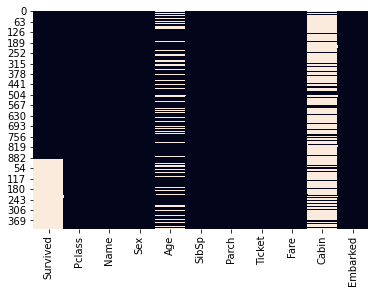

In [9]:
sns.heatmap(df.isnull(), cbar = False)

In [10]:
missing_zero_values_table(df)

Your selected dataframe has 11 columns and 1309 Rows.
There are 5 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Cabin,0,1014,77.5,1014,77.5,object
Survived,549,418,31.9,967,73.9,float64
Age,0,263,20.1,263,20.1,float64
Embarked,0,2,0.2,2,0.2,object
Fare,17,1,0.1,18,1.4,float64


Survived has 418 missing values, exactly the same size as test data. Since the test data does not have survived column, this is expected.<br>
Embarked, Fare have 1/2 missing values, so we can remove these rows.<br>
Cabin has 1014 missing values - Also, it just have the cabin number in which the guest stayed. This is not useful for analysis or modelling so can drop this column.


In [11]:
df.dropna(axis=0 , how="any",subset=['Embarked', 'Fare'] , inplace= True)
df.drop(['Cabin'], axis = 1,inplace=True)


In [12]:
df.shape

(1306, 10)

Age has 263 rows missing i.e 20.1% of total data.

In [13]:
print(df1.Age.isnull().sum())
print(df2.Age.isnull().sum())

177
86


177 values are missing from training set and 86 from test set.

In [14]:
df.Age.describe()

count    1043.000000
mean       29.813202
std        14.366254
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

Removing all rows with missing age will remove 20% of the data. Also values in 'Age' range from 0.17 to 80 so it is difficult to take a median/mean/mode value for 20% of the data.

Will have to devise another way of imputing Age based on other variables.

In [15]:
df.groupby(['Embarked']).Age.mean()

Embarked
C    32.332170
Q    28.630000
S    29.205186
Name: Age, dtype: float64

In [16]:
df.groupby(['Pclass']).Age.mean()

Pclass
1    39.083050
2    29.506705
3    24.745000
Name: Age, dtype: float64

In [17]:
df.groupby(['Sex']).Age.mean()

Sex
female    28.576658
male      30.539696
Name: Age, dtype: float64

In [18]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         36.839695
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.863017
Name: Age, dtype: float64

In [19]:
df.groupby(['Sex','Pclass','Embarked']).Age.mean()

Sex     Pclass  Embarked
female  1       C           38.107692
                Q           35.000000
                S           35.609375
        2       C           19.363636
                Q           30.000000
                S           28.455165
        3       C           16.818182
                Q           24.333333
                S           22.854771
male    1       C           40.047619
                Q           44.000000
                S           41.705977
        2       C           27.269231
                Q           53.750000
                S           30.491702
        3       C           24.129474
                Q           26.738095
                S           26.027370
Name: Age, dtype: float64

In [20]:
df['Age'] = df['Age'].fillna(df.groupby(['Sex','Pclass','Embarked'])['Age'].transform('mean'))

In [21]:
missing_zero_values_table(df)

Your selected dataframe has 10 columns and 1306 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Survived,549,417,31.9,966,74.0,float64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    1306 non-null   int64  
 2   Name      1306 non-null   object 
 3   Sex       1306 non-null   object 
 4   Age       1306 non-null   float64
 5   SibSp     1306 non-null   int64  
 6   Parch     1306 non-null   int64  
 7   Ticket    1306 non-null   object 
 8   Fare      1306 non-null   float64
 9   Embarked  1306 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 112.2+ KB


### Checking Each Varibale

In [25]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
cont_features = ['Age','Fare']
disc_features = ['Survived','Pclass','SibSp','Name','Sex','Ticket','Embarked','Parch']

Summary of Categorical Variables

In [27]:
for col in ['Survived','Pclass','SibSp','Name','Sex','Ticket','Embarked','Parch']:
    #print(col)
    print(df[col].unique()) # to print categories name only
    print(df[col].value_counts()) # to print count of every category
    print(df[col].value_counts()*100/df[col].value_counts().sum()) # to print count of every category

[ 0.  1. nan]
0.0    549
1.0    340
Name: Survived, dtype: int64
0.0    61.754781
1.0    38.245219
Name: Survived, dtype: float64
[3 1 2]
3    708
1    321
2    277
Name: Pclass, dtype: int64
3    54.211332
1    24.578867
2    21.209801
Name: Pclass, dtype: float64
[1 0 3 4 2 5 8]
0    888
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64
0    67.993874
1    24.425727
2     3.215926
4     1.684533
3     1.531394
8     0.689127
5     0.459418
Name: SibSp, dtype: float64
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']
Connolly, Miss. Kate                             2
Kelly, Mr. James                                 2
Dean, Master. Bertram Vere                       1
Silverthorne, Mr. Spencer Victor                 1
West, Miss. Constance Mirium                     1
                                               

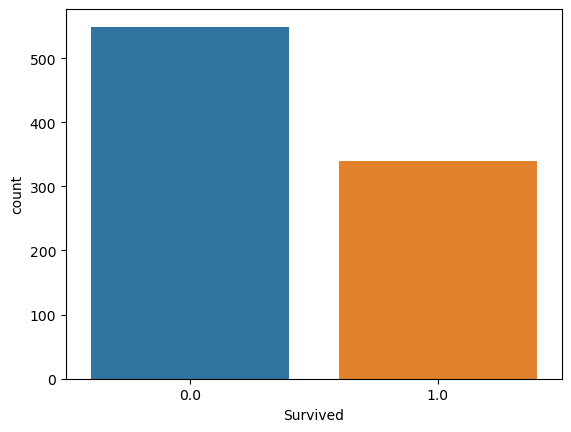

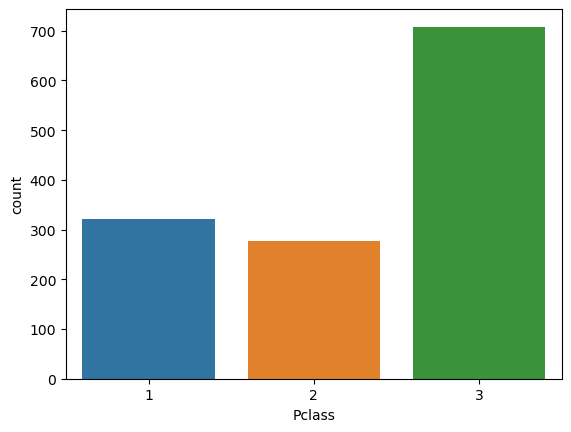

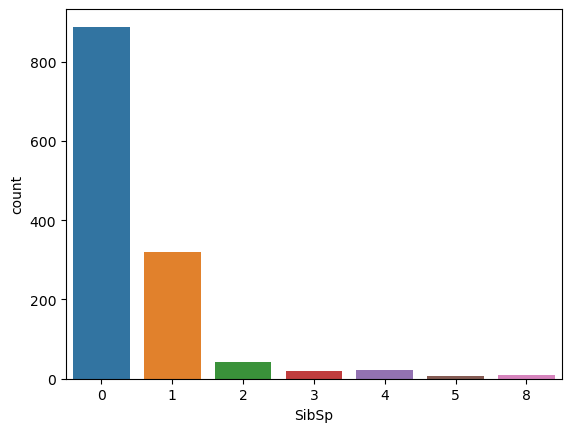

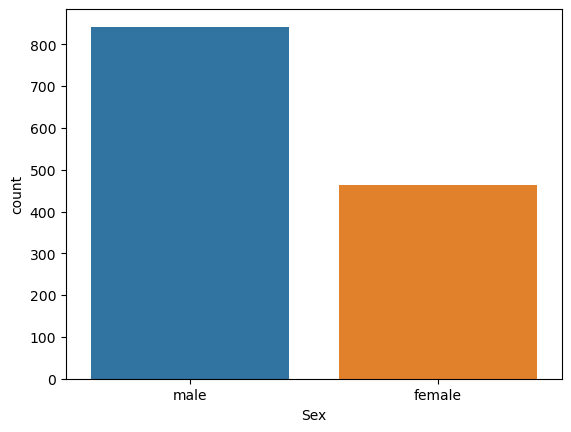

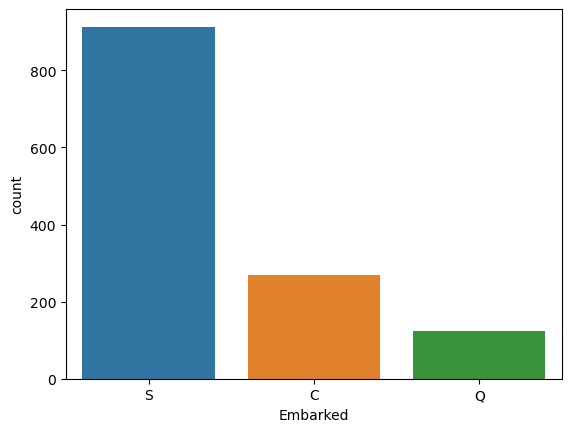

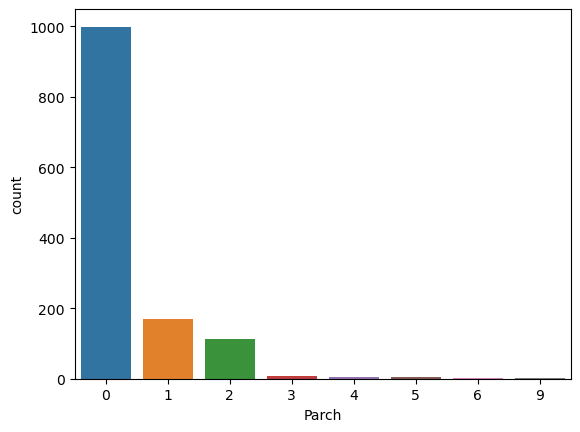

In [28]:
plt.style.use('default')
import warnings
warnings.filterwarnings('ignore')

for col in  ['Survived','Pclass','SibSp','Sex','Embarked','Parch']:
    plt.figure()
    ax = sns.countplot(x = col, data = df)

Though there are some unbalanced variables, overall the categorical variables seem to be clean

'SibSp' -	# of siblings / spouses aboard the Titanic <br>
Sibling - brother, sister, stepbrother, stepsister<br>
Spouse - husband, wife (mistresses and fiancés were ignored)<br>


In [29]:
df[df['SibSp']  > 4]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
59,0.0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.90,S
71,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,CA 2144,46.90,S
159,0.0,3,"Sage, Master. Thomas Henry",male,26.027370,8,2,CA. 2343,69.55,S
180,0.0,3,"Sage, Miss. Constance Gladys",female,22.854771,8,2,CA. 2343,69.55,S
201,0.0,3,"Sage, Mr. Frederick",male,26.027370,8,2,CA. 2343,69.55,S
324,0.0,3,"Sage, Mr. George John Jr",male,26.027370,8,2,CA. 2343,69.55,S
386,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.000000,5,2,CA 2144,46.90,S
480,0.0,3,"Goodwin, Master. Harold Victor",male,9.000000,5,2,CA 2144,46.90,S
683,0.0,3,"Goodwin, Mr. Charles Edward",male,14.000000,5,2,CA 2144,46.90,S
792,0.0,3,"Sage, Miss. Stella Anna",female,22.854771,8,2,CA. 2343,69.55,S


Initially wanted to check rows where siblings and spouses are more than . It is clear that they belonged to Goodwin/Sage Family and are not outliers.

Parch - # of parents / children aboard the Titanic
Parent - mother, father
Child - daughter, son, stepdaughter, stepson

In [30]:
df[df['Parch']  > 4].sort_values('Name')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,0.0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,S
610,0.0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.000000,1,5,347082,31.2750,S
174,NaN,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.000000,1,5,347077,31.3875,S
25,1.0,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,S
139,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.000000,1,6,CA 2144,46.9000,S
678,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.000000,1,6,CA 2144,46.9000,S
638,0.0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.000000,0,5,3101295,39.6875,S
885,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,Q
342,NaN,3,"Sage, Mr. John George",male,26.027370,1,9,CA. 2343,69.5500,S
365,NaN,3,"Sage, Mrs. John (Annie Bullen)",female,22.854771,1,9,CA. 2343,69.5500,S


Initially wanted to check rows where parents and children are more than. Once I sorted them by name, it was clear that they belong to couples.

Variable - 'Name'

In [31]:
df.Name.describe()

count                     1306
unique                    1304
top       Connolly, Miss. Kate
freq                         2
Name: Name, dtype: object

In [32]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1306, dtype: object

In [33]:
df.Name.str.extract('([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [34]:
df.Name.str.extract('([A-Za-z]+)\.', expand=False)

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 1306, dtype: object

In [35]:
df.Name.str.extract('([A-Za-z]+),', expand=False)

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
413      Spector
414        Ocana
415      Saether
416         Ware
417        Peter
Name: Name, Length: 1306, dtype: object

In [36]:
df['Prefix'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)
df['Family_Name'] = df.Name.str.extract('([A-Za-z]+),', expand=False)

In [37]:
df.Name.str.extract('([A-Za-z]+)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [38]:
df.groupby(['Prefix','Sex']).Name.count()

Prefix    Sex   
Capt      male        1
Col       male        4
Countess  female      1
Don       male        1
Dona      female      1
Dr        female      1
          male        7
Jonkheer  male        1
Lady      female      1
Major     male        2
Master    male       61
Miss      female    259
Mlle      female      2
Mme       female      1
Mr        male      756
Mrs       female    196
Ms        female      2
Rev       male        8
Sir       male        1
Name: Name, dtype: int64

Capt - Captain <br>
Col - COLONEL <br>
Jonakheer - <br>
Don - an honorific prefix <br> 
Dona - Madam; Lady <br>
Dr - Doctor <br>
Rev - Reverend <br>
Mlle - Mademoiselle <br>
Mme - Madame

I grouped all the title into 5 classses - Mr, Master, Miss, Mrs, Staff <br>
For staff, it is not clearly given whether the doctor, reverand, military professionals were part of the Titanic crew, but their count is less than 10 so I grouped them together.

In [39]:
df['Prefix'] = df['Prefix'].replace(['Mlle','Ms'], 'Miss')
df['Prefix'] = df['Prefix'].replace(['Mme','Dona','Lady'], 'Mrs')
df['Prefix'] = df['Prefix'].replace(['Jonkheer','Don','Sir'], 'Mr')
df['Prefix'] = df['Prefix'].replace(['Capt','Col','Countess','Dr','Major','Rev'], 'Staff')

In [40]:
df.groupby(['Prefix','Sex']).Name.count()

Prefix  Sex   
Master  male       61
Miss    female    263
Mr      male      759
Mrs     female    199
Staff   female      2
        male       22
Name: Name, dtype: int64

In [41]:
df.drop('Name', axis = 1, inplace = True)

In [42]:
print(df.Ticket.nunique())
print(df1.Ticket.nunique())
print(df2.Ticket.nunique())


927
681
363


Ticket - I am dropping this column as it has very high count of unique values and hence is not useful for analysis or modelling

In [43]:
df.drop('Ticket', axis = 1, inplace=True)

Reviewing dataset

In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix,Family_Name
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Braund
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cumings
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Heikkinen
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Futrelle
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Allen


Numerical Columns

In [45]:
import scipy.stats as stats
def check_outliers(df, variable):
    
    # define figure size
    plt.figure(figsize=(13, 5))

    # histogram
    plt.subplot(1, 3, 1)
    #sns.histplot(df[variable], bins=30)
    sns.distplot(df[variable], bins=40)
    #plt.title('Histogram')
    plt.title('Distplot')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    float64
 1   Pclass       1306 non-null   int64  
 2   Sex          1306 non-null   object 
 3   Age          1306 non-null   float64
 4   SibSp        1306 non-null   int64  
 5   Parch        1306 non-null   int64  
 6   Fare         1306 non-null   float64
 7   Embarked     1306 non-null   object 
 8   Prefix       1306 non-null   object 
 9   Family_Name  1306 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 144.5+ KB


In [47]:
df.describe(include = ['int64', 'float64'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000
mean,0.382452,2.296325,29.345033,0.50000,0.385911,33.223956
std,0.486260,0.837037,13.150018,1.04258,0.866357,51.765986
min,0.000000,1.000000,0.170000,0.00000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.00000,0.000000,7.895800
50%,0.000000,3.000000,26.738095,0.00000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.00000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.00000,9.000000,512.329200


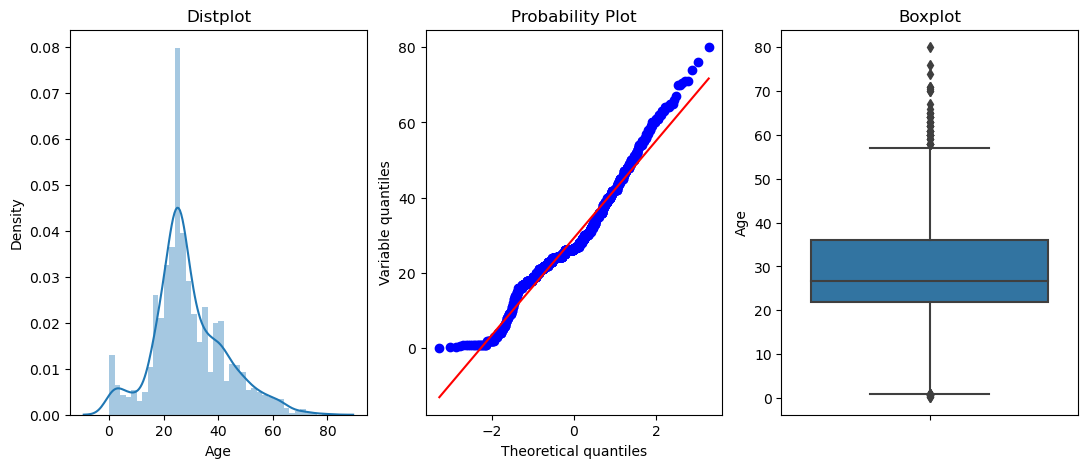

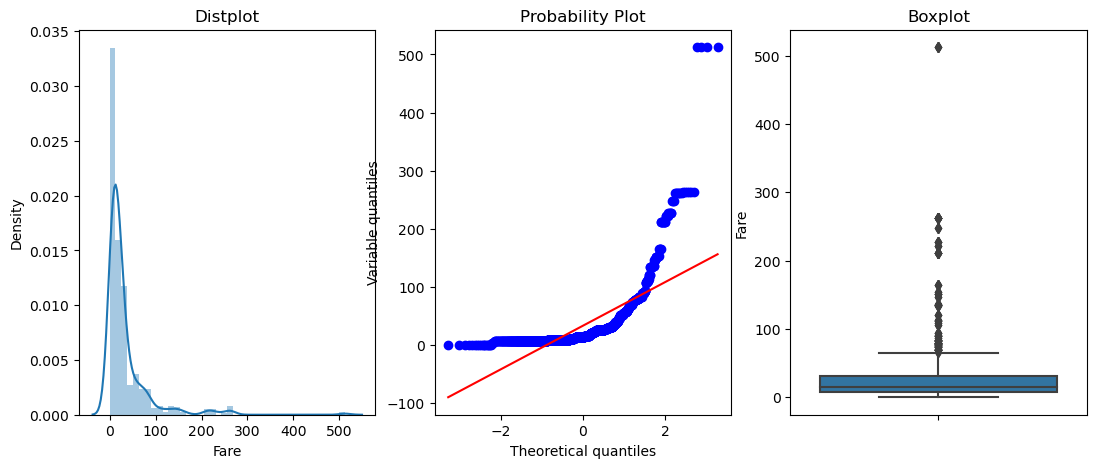

In [48]:
for col in cont_features:
    check_outliers(df, col)

Age category seems to have some outliers. Let's anlyze

In [49]:
df.Age.describe()

count    1306.000000
mean       29.345033
std        13.150018
min         0.170000
25%        22.000000
50%        26.738095
75%        36.000000
max        80.000000
Name: Age, dtype: float64

In [50]:
df.Age.nlargest(10)

630    80.0
96     76.0
851    74.0
96     71.0
493    71.0
116    70.5
672    70.0
745    70.0
81     67.0
33     66.0
Name: Age, dtype: float64

Looks normal.

Fare seems to have a lot of outliers. It may depend on the Pclass - A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>

In [51]:
df.groupby('Pclass').max()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix,Family_Name
Pclass,,,,,,,,,
1,1.0,male,80.0,3,4,512.3292,S,Staff,hoef
2,1.0,male,70.0,3,3,73.5000,S,Staff,Yrois
3,1.0,male,74.0,8,9,69.5500,S,Mrs,Zimmerman


The maximum fare for class 2,3 are 73.5 and 69.5 respectively.

In [52]:
df[df.Fare > 73.5].groupby(['Pclass','Embarked']).mean()

Survived        Age     SibSp     Parch        Fare
Pclass Embarked                                                     
1      C          0.77551  38.684634  0.544304  0.493671  156.767457
       Q          0.50000  38.000000  1.333333  0.000000   90.000000
       S          0.75000  35.757957  0.737705  0.852459  138.968239

In [53]:
df[df.Fare > 73.5].groupby(['Pclass','Embarked']).count()

Survived  Sex  Age  SibSp  Parch  Fare  Prefix  Family_Name
Pclass Embarked                                                             
1      C               49   79   79     79     79    79      79           79
       Q                2    3    3      3      3     3       3            3
       S               44   61   61     61     61    61      61           61

All the tickets > 73.5 from the class 1 were mostly from C - Cherbourg or S - Southampton

In [54]:
df[df.Fare > 73.5].sort_values('Fare', ascending=False)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix,Family_Name
737,1.0,1,male,35.0,0,0,512.3292,C,Mr,Lesurer
679,1.0,1,male,36.0,0,1,512.3292,C,Mr,Cardeza
343,NaN,1,female,58.0,0,1,512.3292,C,Mrs,Cardeza
258,1.0,1,female,35.0,0,0,512.3292,C,Miss,Ward
27,0.0,1,male,19.0,3,2,263.0000,S,Mr,Fortune
...,...,...,...,...,...,...,...,...,...,...
48,NaN,1,female,60.0,0,0,76.2917,C,Mrs,Bucknell
236,NaN,1,male,64.0,1,0,75.2500,C,Mr,Warren
366,1.0,1,female,60.0,1,0,75.2500,C,Mrs,Warren
270,NaN,1,male,46.0,0,0,75.2417,C,Mr,McCaffry


In [55]:
#df.to_csv("Cleaned_Titanic_Data.csv")